# A linear regression learning algorithm example using TensorFlow library.

Linear regression model is one of the simplest regression models. It assumes linear relationship between X and Y. The output equation is defined as follows:
$$\hat{y} = WX + b$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#  Training Parameters
learning_rate = 1e-1
training_epochs = 2000
display_step = 200

200
(200, 1) (200, 1)


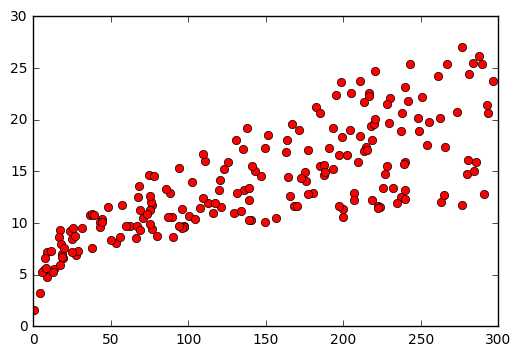

In [3]:
# Load data. Advertising dataset from "An Introduction to Statistical Learning",
# textbook by Gareth James, Robert Tibshirani, and Trevor Hastie 
import numpy as np
data = pd.read_csv('dataset/Advertising.csv',index_col=0)
train_X = data[['TV']].values 

train_Y = data.Sales.values 
train_Y = train_Y[:,np.newaxis]

n_samples = train_X.shape[0]
print n_samples
print train_X.shape, train_Y.shape
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.show()

In [4]:
import tensorflow as tf
# Define tf Graph Inputs
X = tf.placeholder("float",[None,1])
y = tf.placeholder("float",[None,1])

# Create Model variables 
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.mul(X, W), b)

In [5]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(y_pred-y,2))/(2*n_samples) #L2 loss

# Define the optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Gradient descent

In [6]:
# Add summary ops to collect data
w_hist = tf.histogram_summary("weights", W)
b_hist = tf.histogram_summary("biases", b)
y_hist = tf.histogram_summary("y", y_pred)

cost_summary = tf.scalar_summary("cost", cost)

# Merge all the summaries and write them out to /tmp/linear_regression
merged = tf.merge_all_summaries()


Epoch: 0001 cost= 7559.149414062 W= 0.796873 b= 1.67981
Epoch: 0201 cost= 8.403744698 W= 0.072892 b= 2.04738
Epoch: 0401 cost= 6.728885651 W= 0.0648825 b= 3.62269
Epoch: 0601 cost= 5.776206493 W= 0.0578431 b= 5.00651
Epoch: 0801 cost= 5.396698475 W= 0.0528921 b= 5.97979
Epoch: 1001 cost= 5.285205841 W= 0.0499658 b= 6.55506
Epoch: 1201 cost= 5.260797024 W= 0.0484924 b= 6.84472
Epoch: 1401 cost= 5.256837368 W= 0.0478597 b= 6.96909
Epoch: 1601 cost= 5.256369114 W= 0.0476293 b= 7.01438
Epoch: 1801 cost= 5.256329536 W= 0.0475588 b= 7.02823
Optimization Finished!
cost= 5.25633 W= 0.047541 b= 7.03173


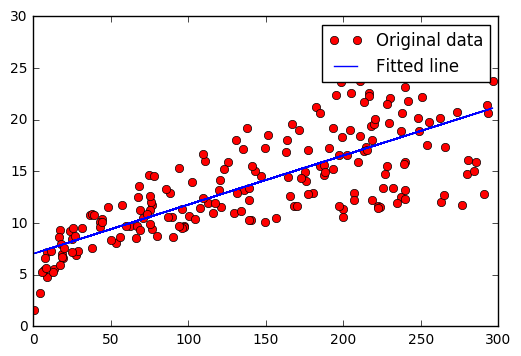

In [7]:
# Initializing the variables
init = tf.initialize_all_variables()
# Launch the graph
with tf.Session() as sess:
    writer = tf.train.SummaryWriter("tmp/linear_regression", sess.graph)
    
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        result = sess.run([optimizer, cost, merged], feed_dict={X: train_X, y: train_Y}) 
        summary_str = result[2]
        writer.add_summary(summary_str, epoch)

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()